# Te

This jupyter notebook is to test the ability of weighted VMF model compared to other emission models when fitting the functional task-evoked data.

<br>

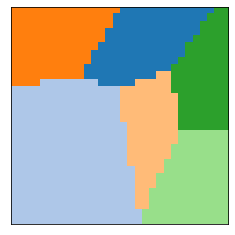

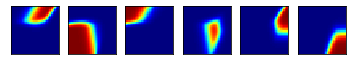

[tensor([0, 2, 1]), tensor([3, 4, 5])]


D:\python_workspace\generativeMRF\full_model.py:474: UserWarning: Likelihood decreased - terminating on iteration 84
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')
D:\python_workspace\generativeMRF\full_model.py:474: UserWarning: Likelihood decreased - terminating on iteration 86
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')


[[[ 3.   3.   3.  30.  30.  30. ]
  [ 7.7  7.7  7.7  7.7  7.7  7.7]
  [ 0.   0.   0.   0.   0.   0. ]
  [ 5.9  5.9  5.9  5.9  5.9  5.9]]

 [[30.  30.  30.   3.   3.   3. ]
  [ 0.   0.   0.   0.   0.   0. ]
  [12.  12.  12.  12.  12.  12. ]
  [11.1 11.1 11.1 11.1 11.1 11.1]]]


D:\python_workspace\generativeMRF\full_model.py:474: UserWarning: Likelihood decreased - terminating on iteration 3
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')


[[[ 3.   3.   3.  30.  30.  30. ]
  [ 3.6  3.5  2.9 30.1 30.  30.1]
  [ 0.   0.   0.   0.   0.   0. ]
  [ 3.1  3.   3.  30.1 30.  30.1]]

 [[30.  30.  30.   3.   3.   3. ]
  [ 0.   0.   0.   0.   0.   0. ]
  [29.8 30.6 30.6 23.1  5.1  3. ]
  [29.8 30.1 30.5  3.   2.9  3. ]]]


In [3]:
import sys
import os
import torch as pt

sys.path.append(os.path.abspath('..'))
from simulate_sessFusion import *

K=6
width=30
nsub_list=np.array([10,10])
M=np.array([10,10],dtype=int)
num_part=2
            
grid, U, U_indv, Uerrors, Props = do_simulation_sessFusion_sess(K=K, M=M,
                                                                    nsubj_list=nsub_list,
                                                                    num_part=num_part,
                                                                    width=width,
                                                                    low_kappa=3,
                                                                    high_kappa=30,
                                                                    plot_trueU=True)


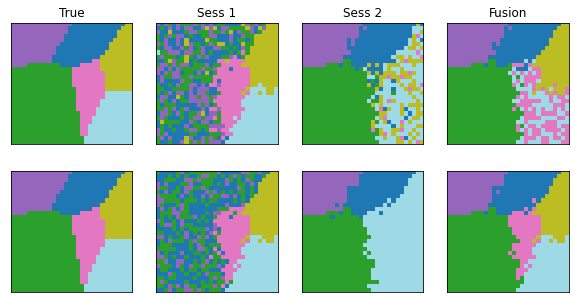

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(10,5))
plot_result(grid, Props, names = ["True", "Sess 1", "Sess 2", "Fusion"], save=True)

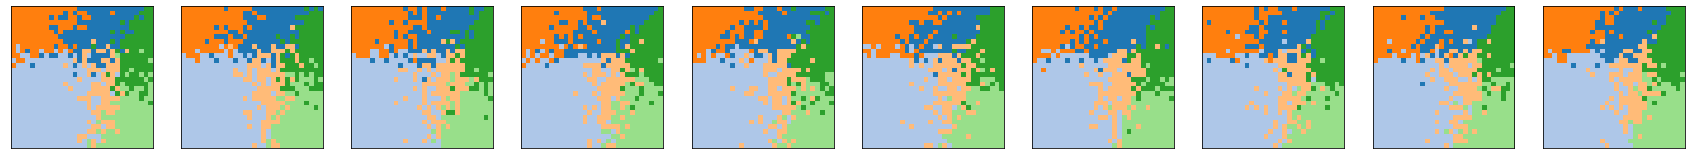

In [7]:
from simulate_sessFusion import _plot_maps
# Plot all true individual maps
plt.figure(figsize=(30,3))
_plot_maps(U, cmap='tab20', grid=[1,10], dim=(width, width), row_labels='True', save=True)

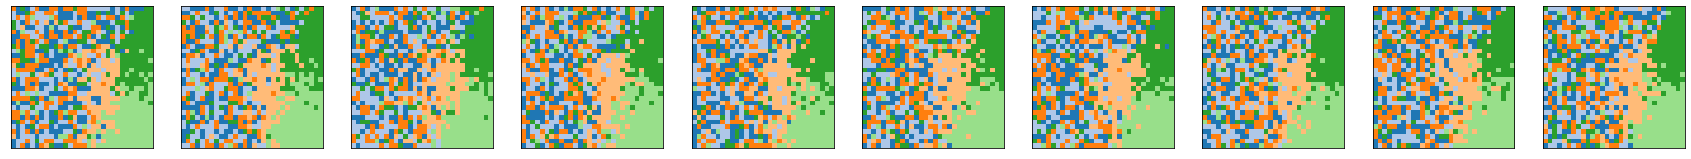

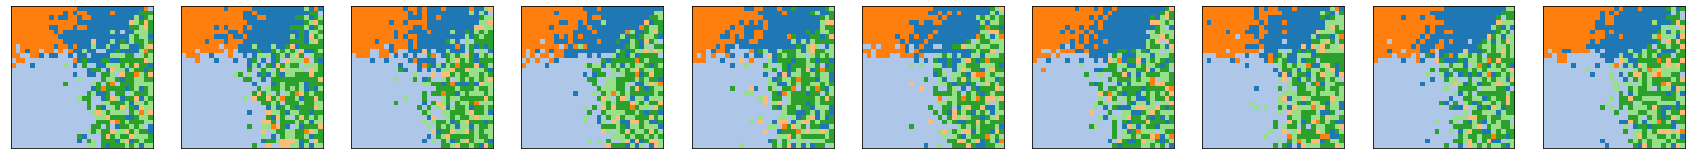

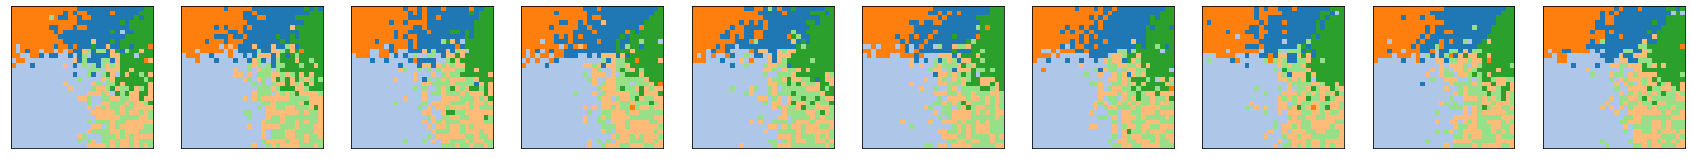

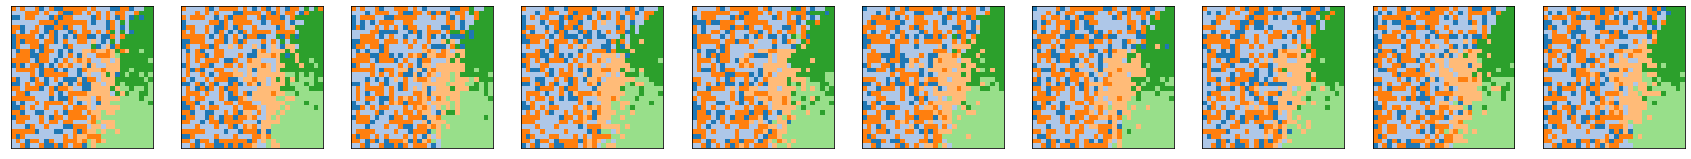

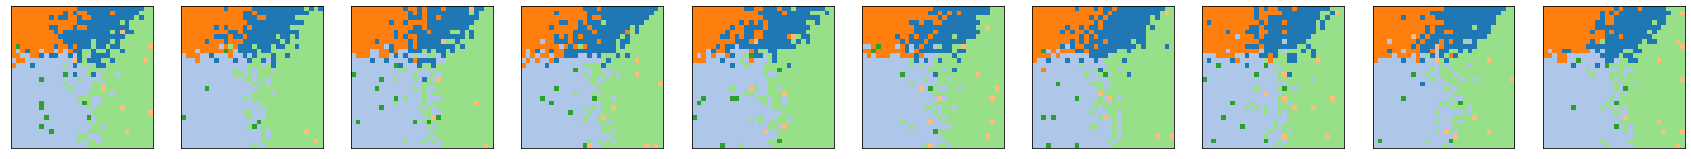

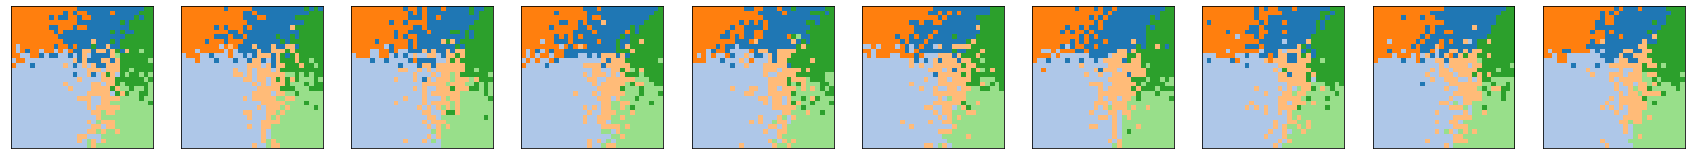

In [9]:
# Plot fitted and aligned individual maps in dataset1, 2 and fusion
labels = ["commonKappa_", "separateKappa_"]
names = ['Sess 1', 'Sess 2', 'Fusion']
for i, us in enumerate(U_indv):
    for j in range(len(us)):
        plt.figure(figsize=(30,3))
        _plot_maps(us[j], cmap='tab20', grid=[1,10], dim=(width, width), row_labels=labels[i]+names[j], save=True)

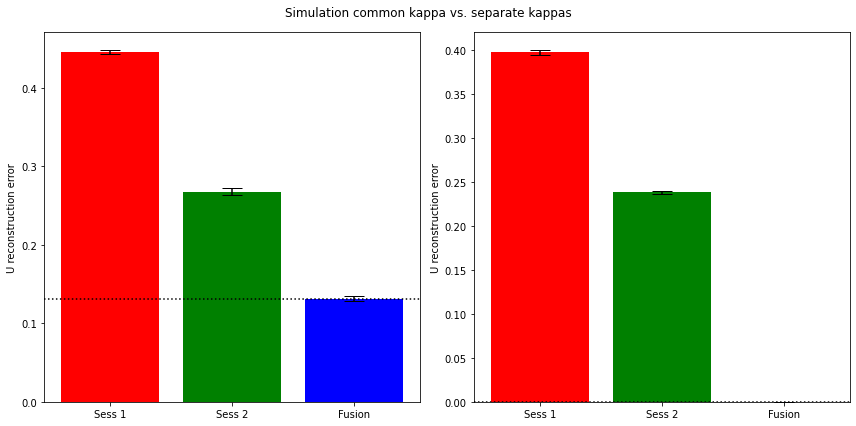

<Figure size 432x288 with 0 Axes>

In [11]:
plot_uerr(Uerrors, names=['Sess 1', 'Sess 2', 'Fusion'], save=True)